# 4LEPTONS

## Setup

In [1]:
# Custom setup for jupyter environments like jupyterhub

import os
import sys
import subprocess

# Equivalent of determining the location of the setup script
LOCAL_DIR = os.path.dirname(os.path.abspath("../../../"))
os.environ["LOCAL_DIR"] = LOCAL_DIR

# Add scripts directory to PYTHONPATH
scripts_path = os.path.join(LOCAL_DIR, "scripts")
if scripts_path not in sys.path:
    sys.path.insert(0, scripts_path)

# Set PYTHONPATH environment variable
if "PYTHONPATH" in os.environ:
    os.environ["PYTHONPATH"] = f"{scripts_path}:{os.environ['PYTHONPATH']}"
else:
    os.environ["PYTHONPATH"] = scripts_path


cmd = "python3 -c 'import fastjet; print(fastjet.__path__[0])'"
fastjet_path = subprocess.check_output(cmd, shell=True).decode().strip()
fastjet_lib_path = os.path.join(fastjet_path, "_fastjet_core/lib")

# Update LD_LIBRARY_PATH
if "LD_LIBRARY_PATH" in os.environ:
    os.environ["LD_LIBRARY_PATH"] = f"{os.environ['LD_LIBRARY_PATH']}:{fastjet_lib_path}"
else:
    os.environ["LD_LIBRARY_PATH"] = fastjet_lib_path

print(f"LOCAL_DIR set to: {os.environ['LOCAL_DIR']}")
print(f"PYTHONPATH now includes: {os.environ.get('PYTHONPATH', '')}")
print(f"LD_LIBRARY_PATH now includes: {os.environ.get('LD_LIBRARY_PATH', '')}")

LOCAL_DIR set to: /home/prayag/coffeafcc/coffea-fcc-analyses
PYTHONPATH now includes: /home/prayag/coffeafcc/coffea-fcc-analyses/scripts:/home/prayag/coffeafcc/coffea-fcc-analyses/scripts:
LD_LIBRARY_PATH now includes: :/home/prayag/coffeafcc/development/fcc-dev/lib64/python3.12/site-packages/fastjet/_fastjet_core/lib:/home/prayag/coffeafcc/development/fcc-dev/lib64/python3.12/site-packages/fastjet/_fastjet_core/lib


## Configuration

In [2]:
# %%writefile config.py
# # =========================================================================================================================
# # Configuration to run the analysis
# # =========================================================================================================================
# # Here the fields are filled with a simple example
# # Fill them with your desired values and delete this line if needed.

# #################
# # Run Variables #
# #################
# process = {
#     'collider':'FCCee',
#     'campaign':'winter2023',
#     'detector':'IDEA',
#     'samples':[
#         # Signal
#         'wzp6_ee_qqH_HZZ_llll_ecm240',
#         'wzp6_ee_nunuH_HZZ_ecm240',
#         # Backgrounds
#         'p8_ee_Zqq_ecm240',
#         'p8_ee_ZZ_ecm240',
#         'p8_ee_WW_ecm240',
#         'wzp6_ee_tautauH_HWW_ecm240',
#         'wzp6_ee_ccH_HWW_ecm240',
#         'wzp6_ee_bbH_HWW_ecm240',
#         'wzp6_ee_mumuH_HWW_ecm240',
#         'wzp6_ee_mumuH_Hcc_ecm240',
#         'wzp6_ee_mumuH_Hbb_ecm240',
#         'wzp6_ee_mumuH_Hgg_ecm240',
#         'wzp6_ee_mumuH_HZa_ecm240',
#         ]
# }
# fraction = {
#         # Signal
#         'wzp6_ee_qqH_HZZ_llll_ecm240':0.01,
#         'wzp6_ee_nunuH_HZZ_ecm240':0.01,
#         # Backgrounds
#         'p8_ee_Zqq_ecm240':0.01,
#         'p8_ee_ZZ_ecm240':0.01,
#         'p8_ee_WW_ecm240':0.01,
#         'wzp6_ee_tautauH_HWW_ecm240':0.01,
#         'wzp6_ee_ccH_HWW_ecm240':0.01,
#         'wzp6_ee_bbH_HWW_ecm240':0.01,
#         'wzp6_ee_mumuH_HWW_ecm240':0.01,
#         'wzp6_ee_mumuH_Hcc_ecm240':0.01,
#         'wzp6_ee_mumuH_Hbb_ecm240':0.01,
#         'wzp6_ee_mumuH_Hgg_ecm240':0.01,
#         'wzp6_ee_mumuH_HZa_ecm240':0.01,
# }
# ecm = 240.0 # #\sqrt(s) in GeV
# local_yaml_dict = "../../filesets/"
# output_path = "outputs"
# output_filename = "4leptons"
# executor = "dask" # 'dask' is local and 'condor' is batch

# use_schema = "FCC"
# schema_version = "latest"

# ###################
# # Plot properties #
# ###################
# plots = {
#     'selectedmuons_p':{'name':'selected_muons_p','title':'$\\mu_p$ [GeV]','xlabel':'$p_T$ [GeV]','ylabel':'Events','bins':250,'xmin':0,'xmax':250},

#     'fourmuons_mass':{'name':'fourMuons_mass','title':'$M_{4\\mu}$ [GeV]','xlabel':'$Mass$ [GeV]','ylabel':'Events','bins':50,'xmin':0,'xmax':250},
#     'fourmuons_pmin':{'name':'fourMuons_pmin','title':'$(P_{4\\mu})_{min}$ [GeV]','xlabel':'$p_{min}$ [GeV]','ylabel':'Events','bins':20,'xmin':0,'xmax':100},

#     'Z_res_mass':{'name':'zll_mass','title':'On-shell $M_{\\mu\\mu}$ [GeV]','xlabel':'$Mass$ [GeV]','ylabel':'Events','bins':50,'xmin':0,'xmax':250},
#     'Z_non_res_mass':{'name':'non_res_Z_m','title':'Off-shell $M_{\\mu\\mu}$ [GeV]','xlabel':'$Mass$ [GeV]','ylabel':'Events','bins':50,'xmin':0,'xmax':250},

#     'vis_e_woMuons':{'name':'vis_e_other_particles','title':'Visible Energy excluding muons [GeV]','xlabel':'$E$ [GeV]','ylabel':'Events','bins':50,'xmin':0,'xmax':250},
#     'iso_least_isolated_muon':{'name':'fourMuons_min_iso','title':'iso(least isolated muon)','xlabel':'iso','ylabel':'Events','bins':50,'xmin':0,'xmax':20},
#     'missing_p':{'name':'pmiss','title':'missing p [GeV]','xlabel':'$p^{miss}$ [GeV]','ylabel':'Events','bins':50,'xmin':0,'xmax':250},
#     'cos_theta_miss':{'name':'cosTheta_miss','title':'Cos(Theta_miss)','xlabel':'$cos_{miss}\\theta$','ylabel':'Events','bins':100,'xmin':0,'xmax':1},

# }


# #############
# # Processor #
# #############
# processor_path = "processor"
# processor_name = "Fourleptons"
# processor_args = []
# processor_kwargs = {}


# ######################
# # Plotting Variables #
# ######################
# selections = ['sel0','sel1','sel2','sel3','sel4','sel5','sel6']
# stack = [True, False]
# log = [True, False]
# formats = ['png']
# req_plots = ['selectedmuons_p','fourmuons_mass','fourmuons_pmin','Z_res_mass','Z_non_res_mass','vis_e_woMuons','iso_least_isolated_muon','missing_p','cos_theta_miss']
# req_hists = {
#         #Signal
#         "qqH_HZZ":{"type":'Signal',"datasets":['wzp6_ee_qqH_HZZ_llll_ecm240'],"color":'red'},
#         "nunuH_HZZ":{"type":'Signal',"datasets":['wzp6_ee_nunuH_HZZ_ecm240'],"color":'orange'},
#         #Background
#         "ZZ":{"type":'Background',"datasets":['p8_ee_ZZ_ecm240'],"color":'blue'},
#         "Zqq":{"type":'Background',"datasets":['p8_ee_Zqq_ecm240'],"color":'yellow'},
#         "mumuH_Hjj":{"type":'Background',"datasets":['wzp6_ee_mumuH_Hbb_ecm240','wzp6_ee_mumuH_Hcc_ecm240','wzp6_ee_mumuH_Hgg_ecm240',],"color":'cyan'},
#         "WW":{"type":'Background',"datasets":['p8_ee_WW_ecm240'],"color":'gray'},
#         "HWW":{"type":'Background',"datasets":['wzp6_ee_mumuH_HWW_ecm240','wzp6_ee_bbH_HWW_ecm240','wzp6_ee_tautauH_HWW_ecm240','wzp6_ee_ccH_HWW_ecm240'],"color":'teal'},
#         "mumuH_HZa":{"type":'Background',"datasets":['wzp6_ee_mumuH_HZa_ecm240'],"color":'green'},
        
# }
# cross_sections = {#in pb # Taken as is from FCC events catalogue at https://fcc-physics-events.web.cern.ch/FCCee/winter2023/Delphesevents_IDEA.php
#                   # Signal
#                   'wzp6_ee_qqH_HZZ_llll_ecm240':3.777e-5,
#                   'wzp6_ee_nunuH_HZZ_ecm240':0.00122,
#                   # Backgrounds
#                   'p8_ee_Zqq_ecm240':52.6539,
#                   'p8_ee_ZZ_ecm240':1.35899,
#                   'p8_ee_WW_ecm240':16.4385,
#                   'wzp6_ee_tautauH_HWW_ecm240':0.001453,
#                   'wzp6_ee_ccH_HWW_ecm240':0.005023,
#                   'wzp6_ee_bbH_HWW_ecm240':0.00645,
#                   'wzp6_ee_mumuH_HWW_ecm240':0.001456,
#                   'wzp6_ee_mumuH_Hcc_ecm240':0.0001956,
#                   'wzp6_ee_mumuH_Hbb_ecm240':0.00394,
#                   'wzp6_ee_mumuH_Hgg_ecm240':0.0005538,
#                   'wzp6_ee_mumuH_HZa_ecm240':1.037e-5,
#                   }
# input_path     = output_path
# plot_path      = 'outputs/plots/'
# intLumi        = 10.80e+06 #in pb-1
# ana_tex        = 'e^{+}e^{-} \\rightarrow ZH \\rightarrow 4\\mu+ X'
# delphesVersion = '3.4.2'
# energy         = ecm #in GeV
# collider       = 'FCC-ee'

# # Extra cosmetics
# yield_table_scale = 0.7 # reduce font sizes in yield table by this factor, so that they fit in the figure area
# legend_location = (0.64, 0.64) # Coordinate of the bottom left corner of the legend wrt to the plot area
# FCC_text_location = (0.30,1.02) # Coordinate of the bottom left corner of the FCC text wrt to the plot area
# Reverse_legend_labels = True # Reverse legend order without changing the stack order


In [3]:
# %%writefile functions.py
# # Helper functions
# import awkward as ak
# import numpy as np
# import vector
# vector.register_awkward()
# # 1. To replace: FCCAnalyses::ZHfunctions::resonanceBuilder_mass(91.2,false)(selected_muons, MCRecoAssociations0, MCRecoAssociations1, ReconstructedParticles, Particle, Particle0, Particle1)
# def resonanceBuilder_mass(resonance_mass=None, use_MC_Kinematics=False, leptons=None, MCRecoAssociations=None, ReconstructedParticles=None, MCParticles=None):
#     '''
#     Build the Z resonance based on the available leptons. Returns the best lepton pair compatible with the Z mass and recoil at 125 GeV
#     technically, it returns a ReconstructedParticleData object with index 0 the di-lepton system, index and 2 the leptons of the pair
#     '''
#     if leptons is None:
#         raise AttributeError("No leptons passed")
#     #Create all the combinations
#     combs = ak.combinations(leptons,2)
#     # Get dileptons
#     lep1 , lep2 = ak.unzip(combs)
#     di_lep = lep1 + lep2 # This process drops any other field except 4 momentum fields

#     # di_lep = ak.zip({"px":di_lep.px,"py":di_lep.py,"pz":di_lep.pz,"E":di_lep.E,"charge":lep1.charge + lep2.charge}, with_name="Momentum4D")
#     di_lep["charge"] =  lep1.charge + lep2.charge

#     # Choose oppositely charged leptons
#     di_lep = di_lep[di_lep.charge == 0]

#     # Sort by closest mass to the resonance value
#     sort_mask = ak.argsort(abs(resonance_mass-di_lep.mass), axis=1)
#     Reso = di_lep[sort_mask]
#     used_lep1 = lep1[sort_mask]
#     used_lep2 = lep2[sort_mask]

#     #Choose the best candidate
#     Reso = ak.fill_none(Reso,[],axis=0) #Transform the None values at axis 0 to []
#     used_lep1 = ak.fill_none(used_lep1, [], axis=0)
#     used_lep2 = ak.fill_none(used_lep2, [], axis=0)
    
    
#     return Reso, used_lep1, used_lep2

# # 2. To replace: FCCAnalyses::ZHfunctions::getTwoHighestPMuons(rest_of_muons)") # Find the higest p muon pair from the remaining muons (off-shell Z)
# def getTwoHighestPMuons(muons):
#     '''
#     Sort by decending P and return the pair of particles with highest P and opposite charges
#     '''
#     if not ak.all(ak.num(ak.drop_none(muons), axis=1) > 1 ):
#         raise IndexError("Need at least two particles!")
#     sorted_muons_p = ak.argsort(muons.p, ascending=False)
#     sorted_muons = muons[sorted_muons_p]

#     # First particle is always selected, if the second one has the opposite charge, then its accepted otherwise we move on to the third and so on
#     # Interestingly, this type of operation is non trivial in an array format
#     first_muon, other_muons = sorted_muons[:, 0], sorted_muons[:, 1:]
#     # All combinations
#     all_comb = ak.cartesian((first_muon, other_muons))
#     l1, l2 = ak.unzip(all_comb)
#     charge_mask = (l1.charge + l2.charge) == 0
#     opp_comb = all_comb[charge_mask]
#     # obtain the first one from here
#     # but first make sure that at least one element is available
#     masked_opp_comb = ak.mask(opp_comb, ak.num(opp_comb, axis=1) > 0)
    
    
#     best_two_muons = masked_opp_comb[:, 0]
#     return ak.unzip(best_two_muons)
# # 3. To sum all the lorentz vectors in a an array of lorentzvectors
# def sum_all(array_of_lv):
#     array_of_lv = ak.drop_none(array_of_lv)
    
#     out = ak.zip(
#         {
#             "px":ak.sum(array_of_lv.px , axis=1),
#             "py":ak.sum(array_of_lv.py , axis=1),
#             "pz":ak.sum(array_of_lv.pz , axis=1),
#             "E":ak.sum(array_of_lv.E , axis=1)
#         },
#         with_name="Momemtum4D"
#     )

#     return out
# # 4. To replace : FCCAnalyses::ZHfunctions::coneIsolation(0.0,0.523599)(fourMuons,rest_of_particles)
# def coneIsolation(particle, rest_of_the_particles, min_dr=0 , max_dr=0.4):
#     ''' Refer: https://github.com/delphes/delphes/blob/master/modules/Isolation.cc#L154
#     '''
#     neutral_particles = ak.mask(rest_of_the_particles, rest_of_the_particles.charge == 0)
#     charged_particles = ak.mask(rest_of_the_particles, rest_of_the_particles.charge != 0)

#     n_combs = ak.cartesian((particle,neutral_particles[:,np.newaxis]), axis=1)
#     n1,n2 = ak.unzip(n_combs)
#     c_combs = ak.cartesian((particle,charged_particles[:,np.newaxis]), axis=1)
#     c1,c2 = ak.unzip(c_combs)

#     n_angle = n1.deltaangle(n2)
#     c_angle = c1.deltaangle(c2)

#     n_angle_mask = (n_angle < max_dr) & (n_angle > min_dr)
#     c_angle_mask = (c_angle < max_dr) & (c_angle > min_dr)

#     filtered_neutral = n2[n_angle_mask]
#     filtered_charged = c2[c_angle_mask]

#     sumNeutral = ak.sum(filtered_neutral.p, axis=2)
#     sumCharged = ak.sum(filtered_charged.p, axis=2)

#     total_sum = sumNeutral + sumNeutral

#     ratio = total_sum / particle.p
    
#     return ratio

In [4]:
from coffea import processor
from coffea.analysis_tools import PackedSelection, Cutflow
import awkward as ak
import numpy as np
import pandas as pd
import dask_awkward as dak
import hist.dask as hda
from collections import namedtuple
import hist
import vector
vector.register_awkward()
import config
import sys
import os
local_dir = os.environ['LOCAL_DIR']
sys.path.append(local_dir)

from scripts.analyzers.ReconstructedParticle import remove, recoilBuilder
from functions import *

plot_props = pd.DataFrame(config.plots)

def get_1Dhist(name, var, flatten=False):
    '''
    name: eg. Zm
    var: eg. variable containing array of mass of Z
    flatten: If to flatten var before fill; True by default
    Returns a histogram
    '''
    props = plot_props[name]
    if flatten : var = dak.ravel(var) # Removes None values and all the nesting
    var = var[~dak.is_none(var, axis=0)] # Remove None values only
    return hda.Hist.new.Reg(props.bins, props.xmin, props.xmax).Double().fill(var)

#################################
#Begin the processor definition #
#################################
class Fourleptons(processor.ProcessorABC):
    '''
    Processor: Define actual calculations here
    '''
    def __init__(self, *args, **kwargs):
        pass

    def process(self,events):

        #Create a Packed Selection object to get a cutflow later
        cut = PackedSelection()

        # Main calculations
        Muons = events.ReconstructedParticles[events.Muonidx0.index]
        Muons["index"] = events.Muonidx0.index # Attach the local index for easier calculations later
        sel_muon = Muons.p > 2.0
        selected_muons = ak.mask(Muons, sel_muon)

        # Select events with at least 4 muons
        at_least_4_muons = ak.num(ak.drop_none(selected_muons), axis=1) > 3
        events_with_at_least_4_muons = ak.mask(events.ReconstructedParticles, at_least_4_muons)

        selected_muons = ak.mask(selected_muons, at_least_4_muons)

        # Build Z resonances
        Z, l1, l2 = resonanceBuilder_mass(resonance_mass=91.2, use_MC_Kinematics=False, leptons=selected_muons)

        # On Shell Z
        zll = ak.firsts(Z)
        l1 = ak.firsts(l1)
        l2 = ak.firsts(l2)

        # Remove the used up muons from the muon list
        on_shell_z_l1 = l1[:, np.newaxis]
        on_shell_z_l2 = l2[:, np.newaxis]
        l1_removed = selected_muons.index != on_shell_z_l1.index
        l2_removed = selected_muons.index != on_shell_z_l2.index
        rest_of_muons = selected_muons[l1_removed & l2_removed]

        m1, m2 = getTwoHighestPMuons(rest_of_muons)

        non_res_Z = m1 + m2
        # Angle between the two
        non_res_Z_angle = m1.deltaangle(m2)

        # Collect all the four Muons
        fourMuons_collected = ak.concatenate(
            (
                l1[:, np.newaxis],
                l2[:, np.newaxis],
                m1[:, np.newaxis],
                m2[:, np.newaxis]
            ),
            axis=1
        )
        fourMuons_collected = ak.mask(fourMuons_collected, ak.num(fourMuons_collected, axis=1) > 3)
        fourMuons = zll + non_res_Z

        fourMuons_pmin = ak.min(fourMuons_collected.p, axis=1)

        # rest_of_particles = remove(events_with_at_least_4_muons, fourMuons_collected)
        rest_of_particles = remove(events.ReconstructedParticles, fourMuons_collected)
        all_others = sum_all(rest_of_particles)

        Emiss = recoilBuilder(sum_all(events.ReconstructedParticles), ecm=config.ecm)
        pmiss = Emiss.E

        # Cone Isolation
        fourMuons_iso = coneIsolation(fourMuons_collected, rest_of_particles, min_dr=0.0, max_dr=0.523599)
        fourMuons_min_iso = ak.max(fourMuons_iso, axis=1)

        #Placeholder
        E = events.ReconstructedParticles.E

        # Define individual cuts
        cut.add('No cut', ak.all(E > 0, axis=1))
        cut.add('cut1', ak.all(E > 0, axis=1))
        cut.add('cut2', ak.all(E > 0, axis=1))
        cut.add('cut3', ak.all(E > 0, axis=1))
        cut.add('cut4', ak.all(E > 0, axis=1))
        cut.add('cut5', ak.all(E > 0, axis=1))
        cut.add('cut6', ak.all(E > 0, axis=1))
        cut.add('at_least_4_muons', at_least_4_muons)


        # Selections: A collection of cuts (event selections)
        sel = {}
        sel[0] = ['No cut']
        sel[1] = ['No cut','cut1']
        sel[2] = ['No cut','cut1','cut2']
        sel[3] = ['No cut','cut1','cut2','cut3']
        sel[4] = ['No cut','cut1','cut2','cut3','cut4']
        sel[5] = ['No cut','cut1','cut2','cut3','cut4','cut5']
        sel[6] = ['No cut','cut1','cut2','cut3','cut4','cut5','cut6']

        # Get cutflow hists
        sel_ocl = {key:cut.cutflow(*val).yieldhist() for key,val in sel.items()}

        # Apply the selection to the relevant variables
        vars_sel = {}
        for key,selections in sel.items():
            vars_sel[key] = {
                'selectedmuons_p':selected_muons.p[cut.all(*selections)],
                'fourmuons_mass':fourMuons.m[cut.all(*selections)],
                'fourmuons_pmin':fourMuons_pmin[cut.all(*selections)],
                'Z_res_mass':zll.m[cut.all(*selections)],
                'Z_non_res_mass':non_res_Z.m[cut.all(*selections)],
                'vis_e_woMuons':all_others.E[cut.all(*selections)],
                'iso_least_isolated_muon':fourMuons_min_iso[cut.all(*selections)],
                'missing_p':pmiss[cut.all(*selections)],
                'cos_theta_miss':Emiss.theta[cut.all(*selections)],
            }


        #Prepare output
        Output = {
            'histograms': {
                'sel0':{name:get_1Dhist(name,var,flatten=True) for name,var in vars_sel[0].items()},
                'sel1':{name:get_1Dhist(name,var,flatten=True) for name,var in vars_sel[1].items()},
                'sel2':{name:get_1Dhist(name,var,flatten=True) for name,var in vars_sel[2].items()},
                'sel3':{name:get_1Dhist(name,var,flatten=True) for name,var in vars_sel[3].items()},
                'sel4':{name:get_1Dhist(name,var,flatten=True) for name,var in vars_sel[4].items()},
                'sel5':{name:get_1Dhist(name,var,flatten=True) for name,var in vars_sel[5].items()},
                'sel6':{name:get_1Dhist(name,var,flatten=True) for name,var in vars_sel[6].items()},
            },
            'cutflow': {
                'sel0': {'Onecut':sel_ocl[0][0],'Cutflow':sel_ocl[0][1],'Labels':sel_ocl[0][2]},
                'sel1': {'Onecut':sel_ocl[1][0],'Cutflow':sel_ocl[1][1],'Labels':sel_ocl[1][2]},
                'sel2': {'Onecut':sel_ocl[2][0],'Cutflow':sel_ocl[2][1],'Labels':sel_ocl[2][2]},
                'sel3': {'Onecut':sel_ocl[3][0],'Cutflow':sel_ocl[3][1],'Labels':sel_ocl[3][2]},
                'sel4': {'Onecut':sel_ocl[4][0],'Cutflow':sel_ocl[4][1],'Labels':sel_ocl[4][2]},
                'sel5': {'Onecut':sel_ocl[5][0],'Cutflow':sel_ocl[5][1],'Labels':sel_ocl[5][2]},
                'sel6': {'Onecut':sel_ocl[6][0],'Cutflow':sel_ocl[6][1],'Labels':sel_ocl[6][2]},
            }
        }
        return Output

    def postprocess(self, accumulator):
        pass

In [5]:
# Custom Runner for Debugging
import config

subset_dataset = ['ZZ']
run_dataset = {name:value for name,value in config.req_hists.items() if name in subset_dataset}

# files = {
#     "ZZ":{
#         "files":{
#             "../../root_files/wzp6_ee_qqH_HZZ_llll_ecm240/events_153721891.root":"events"
#         }
#     }
# }

# redirector = "root://eospublic.cern.ch//"
redirector = "../../../../data/"

files = {
    "wzp6_ee_qqH_HZZ_llll_ecm240":{
        "files":{
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/wzp6_ee_qqH_HZZ_llll_ecm240/events_005041503.root":"events"
        }
    },
    "wzp6_ee_nunuH_HZZ_ecm240":{
        "files":{
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/wzp6_ee_nunuH_HZZ_ecm240/events_125829782.root":"events"
        }
    },
    "p8_ee_Zqq_ecm240":{
        "files":{
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_Zqq_ecm240/events_071359088.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_Zqq_ecm240/events_198516146.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_Zqq_ecm240/events_143896201.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_Zqq_ecm240/events_006774806.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_Zqq_ecm240/events_078176229.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_Zqq_ecm240/events_012033458.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_Zqq_ecm240/events_109546439.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_Zqq_ecm240/events_002474227.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_Zqq_ecm240/events_019688220.root":"events",
        }
    },
    "p8_ee_ZZ_ecm240":{
        "files":{
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_ZZ_ecm240/events_136205668.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_ZZ_ecm240/events_123306959.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_ZZ_ecm240/events_120540733.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_ZZ_ecm240/events_140312332.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_ZZ_ecm240/events_061458088.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_ZZ_ecm240/events_110402882.root":"events",
        }
    },
    "p8_ee_WW_ecm240":{
        "files":{
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_WW_ecm240/events_192501667.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_WW_ecm240/events_007894598.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_WW_ecm240/events_020415084.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_WW_ecm240/events_160970904.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_WW_ecm240/events_073282074.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_WW_ecm240/events_139735967.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_WW_ecm240/events_125634873.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_WW_ecm240/events_145109828.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_WW_ecm240/events_172018966.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_WW_ecm240/events_184100847.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_WW_ecm240/events_189099441.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_WW_ecm240/events_079516664.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_WW_ecm240/events_138832718.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_WW_ecm240/events_196817004.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_WW_ecm240/events_036143042.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_WW_ecm240/events_066297168.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_WW_ecm240/events_046295545.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_WW_ecm240/events_178789696.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_WW_ecm240/events_197172538.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_WW_ecm240/events_058755425.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_WW_ecm240/events_111450884.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_WW_ecm240/events_093318601.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_WW_ecm240/events_013331738.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_WW_ecm240/events_145727424.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_WW_ecm240/events_181772956.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_WW_ecm240/events_090973171.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_WW_ecm240/events_013376980.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_WW_ecm240/events_113330458.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_WW_ecm240/events_004337014.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_WW_ecm240/events_069636724.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_WW_ecm240/events_057526943.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_WW_ecm240/events_088392846.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_WW_ecm240/events_179500875.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_WW_ecm240/events_159107063.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_WW_ecm240/events_080759007.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_WW_ecm240/events_042241038.root":"events",
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/p8_ee_WW_ecm240/events_197100271.root":"events",
        }
    },
    "wzp6_ee_tautauH_HWW_ecm240":{
        "files":{
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/wzp6_ee_tautauH_HWW_ecm240/events_158197636.root":"events"
        }
    },
    "wzp6_ee_ccH_HWW_ecm240":{
        "files":{
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/wzp6_ee_ccH_HWW_ecm240/events_135308188.root":"events"
        }
    },
    "wzp6_ee_bbH_HWW_ecm240":{
        "files":{
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/wzp6_ee_bbH_HWW_ecm240/events_021005740.root":"events"
        }
    },
    "wzp6_ee_mumuH_HWW_ecm240":{
        "files":{
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/wzp6_ee_mumuH_HWW_ecm240/events_071220024.root":"events"
        }
    },
    "wzp6_ee_mumuH_Hcc_ecm240":{
        "files":{
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/wzp6_ee_mumuH_Hcc_ecm240/events_189916518.root":"events"
        }
    },
    "wzp6_ee_mumuH_Hbb_ecm240":{
        "files":{
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/wzp6_ee_mumuH_Hbb_ecm240/events_159112833.root":"events"
        }
    },
    "wzp6_ee_mumuH_Hgg_ecm240":{
        "files":{
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/wzp6_ee_mumuH_Hgg_ecm240/events_076993011.root":"events"
        }
    },
    "wzp6_ee_mumuH_HZa_ecm240":{
        "files":{
            redirector+"eos/experiment/fcc/ee/generation/DelphesEvents/winter2023/IDEA/wzp6_ee_mumuH_HZa_ecm240/events_190924913.root":"events"
        }
    },
}


In [6]:
from coffea.nanoevents import BaseSchema
from coffea.nanoevents import FCC
import numpy as np
from coffea.dataset_tools import apply_to_fileset,max_chunks,preprocess
import dask
from dask.diagnostics import ProgressBar
pgb = ProgressBar()
pgb.register()

/home/prayag/coffeafcc/development/coffea/src/coffea/nanoevents/schemas/edm4hep.py:7: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


In [7]:
dataset_runnable, dataset_updated = preprocess(
    files,
    align_clusters=False,
    step_size=5_000,
    files_per_batch=1,
    skip_bad_files=True,
    save_form=False,
)

[########################################] | 100% Completed | 101.90 ms
[########################################] | 100% Completed | 8.05 ss


In [8]:
to_compute = apply_to_fileset(
    Fourleptons(),
    dataset_runnable,
    # schemaclass=FCC.get_schema("latest"),
    schemaclass=FCC.get_schema("pre-edm4hep1"),
    uproot_options={"filter_name": lambda x : "PARAMETERS" not in x}
)

/home/prayag/coffeafcc/development/coffea/src/coffea/util.py:224: UserWarning: Skipping _intMap as it is not interpretable by Uproot
  warnings.warn(
/home/prayag/coffeafcc/development/coffea/src/coffea/util.py:232: UserWarning: Skipping _intMap.first as it is not interpretable by Uproot
  warnings.warn(
/home/prayag/coffeafcc/development/coffea/src/coffea/util.py:232: UserWarning: Skipping _intMap.second as it is not interpretable by Uproot
  warnings.warn(
/home/prayag/coffeafcc/development/coffea/src/coffea/util.py:224: UserWarning: Skipping _floatMap as it is not interpretable by Uproot
  warnings.warn(
/home/prayag/coffeafcc/development/coffea/src/coffea/util.py:232: UserWarning: Skipping _floatMap.first as it is not interpretable by Uproot
  warnings.warn(
/home/prayag/coffeafcc/development/coffea/src/coffea/util.py:232: UserWarning: Skipping _floatMap.second as it is not interpretable by Uproot
  warnings.warn(
/home/prayag/coffeafcc/development/coffea/src/coffea/util.py:224: Us

In [9]:
with pgb:
    computed = dask.compute(to_compute)
(Out,) = computed

[########################################] | 100% Completed | 7.69 ss
[########################################] | 100% Completed | 19m 24s


In [21]:
from collections import defaultdict
from numbers import Number

def accumulate(dicts):
    """
    Recursively merges a list of dictionaries, supporting:
    - Numeric summation
    - List concatenation
    - Set union
    - Histogram addition (from `hist`)
    - Nested dictionaries
    - Key exceptions (preserve first)
    """
    try:
        from hist import Hist
    except ImportError:
        Hist = None  # Skip if hist is not available

    exception_list = {'Labels'}
    grouped = defaultdict(list)

    for d in dicts:
        for k, v in d.items():
            grouped[k].append(v)

    outdict = {}

    for key, values in grouped.items():
        first = values[0]

        if key in exception_list:
            outdict[key] = first
        elif all(isinstance(v, dict) for v in values):
            outdict[key] = accumulate(values)
        elif all(isinstance(v, list) for v in values):
            outdict[key] = sum(values, [])  # concatenate
        elif all(isinstance(v, set) for v in values):
            result = set()
            for v in values:
                result |= v
            outdict[key] = result
        elif Hist and all(isinstance(v, Hist) for v in values):
            total = values[0]
            for v in values[1:]:
                total += v
            outdict[key] = total
        elif all(isinstance(v, Number) for v in values):
            outdict[key] = sum(values)
        else:
            # Mixed types or strings — keep the first
            outdict[key] = first

    return outdict
def hist_sorter(preferred_order, unsorted_hists, unsorted_labels, unsorted_colors):
    '''Custom histogram sorter to plot in histplot'''
    sorted_hists, sorted_labels, sorted_colors = [], [], []
    for l in preferred_order[::-1]:
        pos = unsorted_labels.index(l)
        sorted_hists.append(unsorted_hists[pos])
        sorted_labels.append(unsorted_labels[pos])
        sorted_colors.append(unsorted_colors[pos])

    return sorted_hists, sorted_labels, sorted_colors


In [22]:
cross_sections = {#in pb # Taken as is from FCC events catalogue at https://fcc-physics-events.web.cern.ch/FCCee/winter2023/Delphesevents_IDEA.php
                  # Signal
                  'wzp6_ee_qqH_HZZ_llll_ecm240':3.777e-5,
                  'wzp6_ee_nunuH_HZZ_ecm240':0.00122,
                  # Backgrounds
                  'p8_ee_Zqq_ecm240':52.6539,
                  'p8_ee_ZZ_ecm240':1.35899,
                  'p8_ee_WW_ecm240':16.4385,
                  'wzp6_ee_tautauH_HWW_ecm240':0.001453,
                  'wzp6_ee_ccH_HWW_ecm240':0.005023,
                  'wzp6_ee_bbH_HWW_ecm240':0.00645,
                  'wzp6_ee_mumuH_HWW_ecm240':0.001456,
                  'wzp6_ee_mumuH_Hcc_ecm240':0.0001956,
                  'wzp6_ee_mumuH_Hbb_ecm240':0.00394,
                  'wzp6_ee_mumuH_Hgg_ecm240':0.0005538,
                  'wzp6_ee_mumuH_HZa_ecm240':1.037e-5,
                  }
intLumi        = 10.80e+06 #in pb-1
import copy
def get_scaled_hist(output_from_processor, hist_key = ''):
    out = copy.deepcopy(output_from_processor)
    for key in output_from_processor.keys():
        raw_mc = output_from_processor[key]['cutflow']['sel0']['Cutflow'][0]
        scale_factor = intLumi*cross_sections[key] / raw_mc
        out[key]['histograms']['sel0'][hist_key] *= scale_factor
    return out

In [ ]:
# Scaled_Out[d]['histograms']['sel0']['Z_non_res_mass']

In [36]:
# which_hist = 'fourmuons_mass'
which_hist = 'Z_res_mass'
# which_hist = 'Z_non_res_mass'
Scaled_Out = get_scaled_hist(Out, hist_key=which_hist)

In [37]:
hists_to_plot = []
labels = []
colors = []
for sample in config.req_hists.keys():
    hists = []
    for d in config.req_hists[sample]['datasets']:
        hists.append(Scaled_Out[d]['histograms']['sel0'][which_hist])
    hists_to_plot.append(sum(hists))
    labels.append(sample)
    colors.append(config.req_hists[sample]['color'])


In [38]:
order = ['ZZ', 'Zqq', 'mumuH_Hjj', 'WW', 'HWW', 'mumuH_HZa']
h, l, c = hist_sorter(order, hists_to_plot, labels, colors)

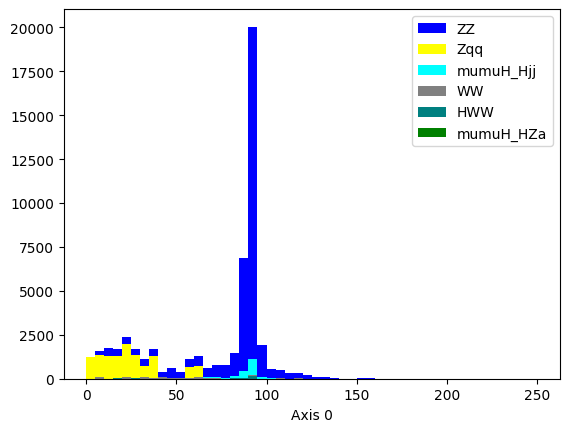

In [39]:
import mplhep as hep
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
hep.histplot(
    h,
    label=l,
    color=c,
    histtype='fill',
    stack=True,
    ax = ax
)
ax.legend()

In [27]:
from coffea.nanoevents import NanoEventsFactory, FCC
file_tree = list(files['wzp6_ee_qqH_HZZ_llll_ecm240']['files'].keys())[0]+":events"
events = NanoEventsFactory.from_root(
    file_tree,
    schemaclass=FCC.get_schema("pre-edm4hep1"),
    entry_stop=10000,
    delayed=True,
    uproot_options = {"filter_name": lambda x : "PARAMETERS" not in x}
).events()

In [17]:
# Main calculations
Muons = events.ReconstructedParticles[events.Muonidx0.index]
Muons["index"] = events.Muonidx0.index # Attach the local index for easier calculations later
sel_muon = Muons.p > 2.0
selected_muons = ak.mask(Muons, sel_muon)

# Select events with at least 4 muons
at_least_4_muons = ak.num(ak.drop_none(selected_muons), axis=1) > 3
events_with_at_least_4_muons = ak.mask(events.ReconstructedParticles, at_least_4_muons)

selected_muons = ak.mask(selected_muons, at_least_4_muons)

# Build Z resonances
Z, l1_raw, l2_raw = resonanceBuilder_mass(resonance_mass=91.2, use_MC_Kinematics=False, leptons=selected_muons)

# On Shell Z
zll = ak.firsts(Z)
l1 = ak.firsts(l1_raw)
l2 = ak.firsts(l2_raw)

# Remove the used up muons from the muon list
on_shell_z_l1 = l1[:, np.newaxis]
on_shell_z_l2 = l2[:, np.newaxis]
l1_removed = selected_muons.index != on_shell_z_l1.index
l2_removed = selected_muons.index != on_shell_z_l2.index
rest_of_muons = selected_muons[l1_removed & l2_removed]


In [18]:
muons = selected_muons

if not ak.all(ak.num(ak.drop_none(muons), axis=1) > 1 ):
    raise IndexError("Need at least two particles!")
sorted_muons_p = ak.argsort(muons.p, ascending=False)
sorted_muons = muons[sorted_muons_p]

# First particle is always selected, if the second one has the opposite charge, then its accepted otherwise we move on to the third and so on
# Interestingly, this type of operation is non trivial in an array format
first_muon, other_muons = sorted_muons[:, 0:1], sorted_muons[:, 1:]

In [19]:
# All combinations
# val,depth = first_muon.layout.branch_depth
# if depth == 1 : first_muon = first_muon[:, np.newaxis]
# prepare before cartesian : replace none with []
first_muon = ak.fill_none(first_muon, [], axis=0)
other_muons = ak.fill_none(other_muons, [], axis=0)
all_comb = ak.cartesian((first_muon, other_muons))
l1, l2 = ak.unzip(all_comb)
charge_mask = (l1.charge + l2.charge) == 0
opp_comb = all_comb[charge_mask]
# obtain the first one from here
# but first make sure that at least one element is available
masked_opp_comb = ak.mask(opp_comb, ak.num(opp_comb, axis=1) > 0)

ak.all(l2.index == other_muons.index)

dask.awkward<all, type=Scalar, dtype=bool>

In [20]:
j1, j2 = ak.unzip(ak.combinations((first_muon, other_muons), 2))

AssertionError: 

In [ ]:
all_comb

In [ ]:
ak.combinations((first_muon, other_muons), 2)

In [ ]:
ak.all(l1.index==j1.index)

In [40]:
cumsum = np.array([100,200,300,400,500])

In [41]:
needed_events = 341

In [64]:
def assign_events(cumsum, needed_events):
    if needed_events > cumsum[-1]:
        return len(cumsum)-1 
    diff = cumsum - needed_events
    return np.argwhere(diff >= 0)[0][0]

In [65]:
index = assign_events(cumsum, 700)
cumsum[index]

np.int64(500)